--------
## Step 1: Pseudocode
[Latex Source](https://www.overleaf.com/6663695rcdbbh#/22616031/)

--------
## Step 2: Simulations & Details of Their Parameters

##### Success
- A 4 dimension matrix 4 trigonometric functions are plotted. There are each a repetition of a sine wave and cosine wave. PCA will reduce the 2 insignificant columns out of 4. 

##### Failure
- A 4 dimension matrix in which 4 trig functions are plotted (our signal) and the 4th one is an outlier cosine wave of noise that has even more variance than the previous three. PCA will fail to reduce the insignificant column, but instead retain the noise.

-------
## Step 3: Choose Visualization
We will use a scatter plot in which the EEG data are shown- the pre-PCA graph and the post-PCA graph will be shown on the same plot. Correctly reduced PCA graphs will have less of a fluctuation. Also, we graph the amount of dimensions or the "eigenvalues" and check if the manual selection of elbows using common sense will match our automatic selection.

-------
## Step 4: Specify Metrics for Evaluating Performance
We will use the *truth* function, which returns 1 if signal matrix match with the PCA reduced matrix and 0 if they do not. 

------
## Step 5: Write Code Generating Simulated Data

### Success (EEG Data)

In [465]:
import numpy as np
import h5py
import pandas as pd 
import matplotlib.pyplot as plt

y1 = 8. * np.sin(2. * np.array(range(0,365,5)) * np.pi / 180. )
y2 = 8. * np.sin(2. * np.array(range(0,365,5)) * np.pi / 180. )
y4 = 6. * np.cos(2. * np.array(range(0,365,5)) * np.pi / 180. )
y5 = 6. * np.cos(2. * np.array(range(0,365,5)) * np.pi / 180. )
y = np.column_stack((y1, y2, y3, y4))

y = pd.DataFrame(data=y[0:,0:])    # values

### Failure (Random Matrix)

In [466]:
z1 = 10. * np.sin(2. * np.array(range(0,365,5)) * np.pi / 180. )
z2 = 8. * np.sin(2. * np.array(range(0,365,5)) * np.pi / 180. )
z3 = 12. * np.sin(2. * np.array(range(0,365,5)) * np.pi / 180. )
z4 = 36. * np.cos(3.5 * np.array(range(0,365,5)) * np.pi / 180.)
z = np.column_stack((z1, z2, z3, z4))
z = pd.DataFrame(data=z[0:,0:]) 

----------
## Step 7: Plot Simulated Data

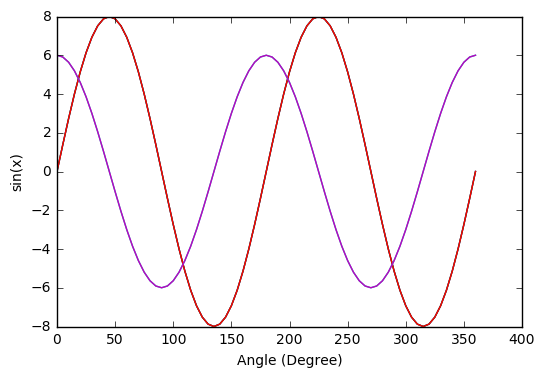

In [467]:
import matplotlib.pyplot as plt

x = range(0,365,5)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.plot(x,y5)
plt.xlabel('Angle (Degree)')
plt.ylabel('sin(x)')
plt.show()

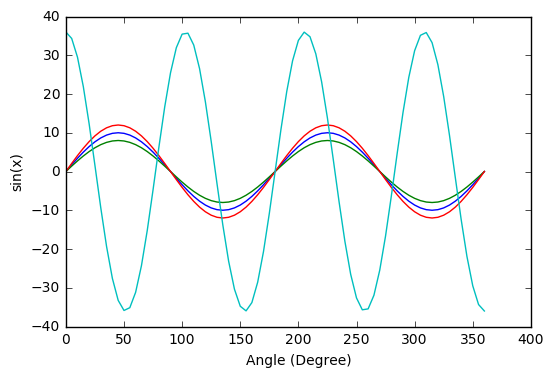

In [479]:
x = range(0,365,5)
plt.plot(x,z1)
plt.plot(x,z2)
plt.plot(x,z3)
plt.plot(x,z4)
plt.xlabel('Angle (Degree)')
plt.ylabel('sin(x)')
plt.show()

Note: The Purple curve is shown as the outlier or the "noise". 

---------
## Step 8: Write Algorithm Code

In [469]:
import sklearn

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets
from scipy import stats
from sklearn.preprocessing import scale

PCAX = y.values
PCAX = scale(PCAX)
pca = PCA(n_components=4)
pca.fit(PCAX)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
print(var)

[  7.50000000e-01   2.50000000e-01   4.41954569e-33   0.00000000e+00]


In [470]:
from matplotlib import pyplot as mp
import numpy as np
import math

def gaussian(x, mu, sig):
    return 1./(math.sqrt(2.*math.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

array = var
array2 = [A * 1000 for A in array]

p = len(array2)
totalSum = [0]*(p-1)

for q in range(1,p):
    FirstArray, SecondArray = np.split(array2, [q,])
    mu1 = np.mean(FirstArray)
    mu2 = np.mean(SecondArray)
    s1 = np.var(FirstArray)
    s2 = np.var(SecondArray)
    if q-1 == 0:
        s1 = 0
    totalvariance = (((q-1)*(s1*s1)) + ((p-q-1)*(s2*s2))) / (p-2)
    Sum1 = 0
    Sum2 = 0
    for i in range(len(FirstArray)):
        x = FirstArray[i]
        x1 = np.log10(gaussian(x, mu1, totalvariance))
        Sum1 += x1
    for j in range(len(SecondArray)):
        y = SecondArray[j]
        y1 = np.log10(gaussian(y, mu2, totalvariance))
        Sum2 += y1
    totalSum[q-1] = Sum1 + Sum2

dimension = np.argmax(totalSum) + 1
print dimension
#for mu, sig in [(-1, 1), (0, 2), (2, 3)]:
#   mp.plot(gaussian(np.linspace(-3, 3, 120), mu, sig))

#mp.show()

1


In [471]:
W = z.values
W = scale(W)
pcafail = PCA(n_components=4)
pcafail.fit(W)
varfail = pcafail.explained_variance_ratio_
print(varfail)

#The amount of variance that each PC explains
failarray= varfail
failarray2 = [B * 1000 for B in failarray] 

p = len(failarray2)
totalSum1 = [0]*(p-1)

for q in range(1,p):
    FirstArray, SecondArray = np.split(failarray2, [q,])
    mu1 = np.mean(FirstArray)
    mu2 = np.mean(SecondArray)
    s1 = np.var(FirstArray)
    s2 = np.var(SecondArray)
    if q-1 == 0:
        s1 = 0
    totalvariance = (((q-1)*(s1*s1)) + ((p-q-1)*(s2*s2))) / (p-2)
    Sum1 = 0
    Sum2 = 0
    for i in range(len(FirstArray)):
        x = FirstArray[i]
        x1 = np.log10(gaussian(x, mu1, totalvariance))
        Sum1 += x1
    for j in range(len(SecondArray)):
        y = SecondArray[j]
        y1 = np.log10(gaussian(y, mu2, totalvariance))
        Sum2 += y1
    totalSum1[q-1] = Sum1 + Sum2
    
dimension1 = np.argmax(totalSum1) + 1
print dimension1

[  7.58633144e-01   2.41366856e-01   7.11561792e-33   1.09320209e-33]
1


------
## Step 9: Write Qualitative Evaluation Code

### Success

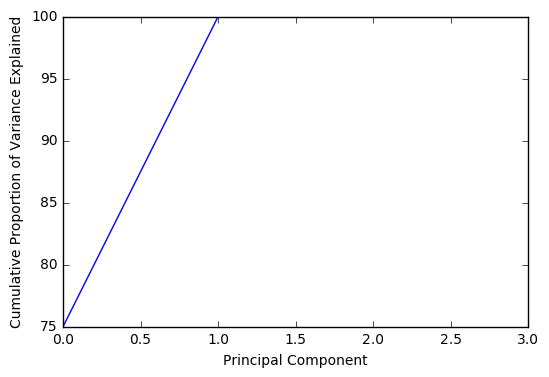

In [472]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Proportion of Variance Explained")
plt.show()

### Failure

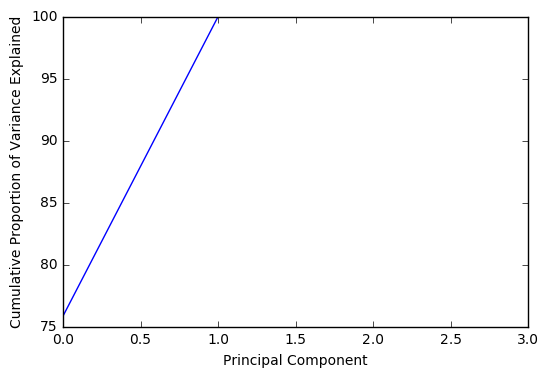

In [473]:
var2=np.cumsum(np.round(failarray, decimals=4)*100)

plt.plot(var2)
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Proportion of Variance Explained")
plt.show()

-------
## Step 11: Run + Qualitatively Evaluate Simulation

### Success

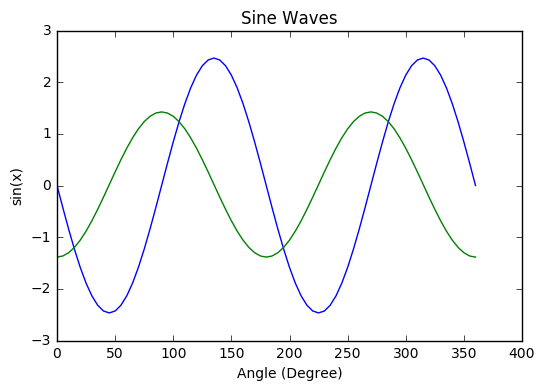

[ -1.59285559e-15  -4.28293060e-01  -8.43572652e-01  -1.23322072e+00
  -1.58539799e+00  -1.88940375e+00  -2.13600094e+00  -2.31769681e+00
  -2.42897064e+00  -2.46644143e+00  -2.42897064e+00  -2.31769681e+00
  -2.13600094e+00  -1.88940375e+00  -1.58539799e+00  -1.23322072e+00
  -8.43572652e-01  -4.28293060e-01  -4.20080734e-16   4.28293060e-01
   8.43572652e-01   1.23322072e+00   1.58539799e+00   1.88940375e+00
   2.13600094e+00   2.31769681e+00   2.42897064e+00   2.46644143e+00
   2.42897064e+00   2.31769681e+00   2.13600094e+00   1.88940375e+00
   1.58539799e+00   1.23322072e+00   8.43572652e-01   4.28293060e-01
   4.43916260e-16  -4.28293060e-01  -8.43572652e-01  -1.23322072e+00
  -1.58539799e+00  -1.88940375e+00  -2.13600094e+00  -2.31769681e+00
  -2.42897064e+00  -2.46644143e+00  -2.42897064e+00  -2.31769681e+00
  -2.13600094e+00  -1.88940375e+00  -1.58539799e+00  -1.23322072e+00
  -8.43572652e-01  -4.28293060e-01  -1.02418465e-15   4.28293060e-01
   8.43572652e-01   1.23322072e+00

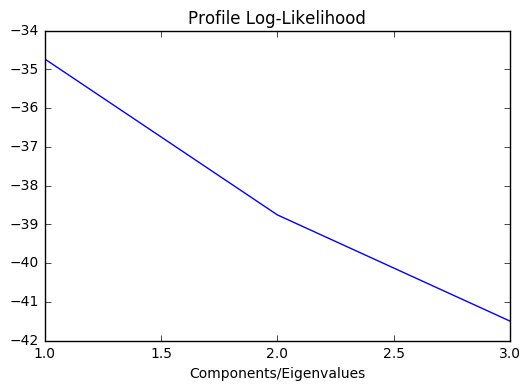

In [480]:
pca = PCA(n_components=2)
pca.fit(PCAX)
H = pca.fit_transform(PCAX)
v_range = H[0:,0];
v_range2 = H[0:,1];
x=range(0,365,5)
plt.plot(x, v_range)
plt.plot(x, v_range2)
plt.title('Sine Waves')
plt.xlabel('Angle (Degree)')
plt.ylabel('sin(x)')
plt.show()

numbers=range(1,4)
plt.plot(numbers,totalSum)
plt.title('Profile Log-Likelihood')
plt.xlabel('Components/Eigenvalues')
plt.show()

### Failure

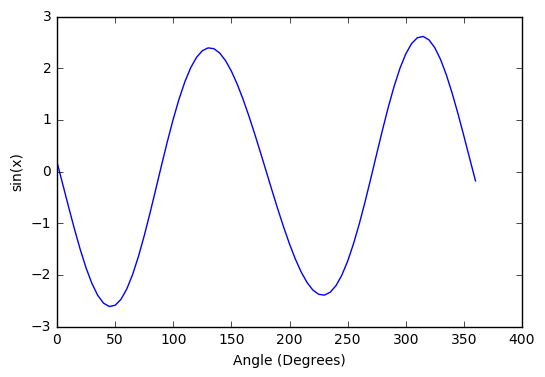

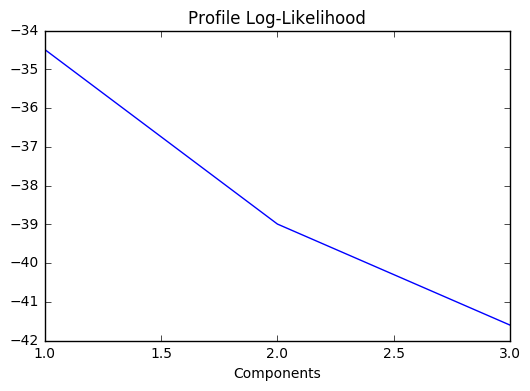

In [478]:
pcafail = PCA(n_components=1)
pcafail.fit(W)
V = pcafail.fit_transform(W)
v_rangz = V[0:,0];

plt.plot(x,v_rangz)
plt.xlabel('Angle (Degrees)')
plt.ylabel('sin(x)')
plt.show()

numbers1=range(1,4)
plt.plot(numbers1,totalSum1)
plt.title('Profile Log-Likelihood')
plt.xlabel('Components')
plt.show()

## Step 12: Quantitative Evaluation

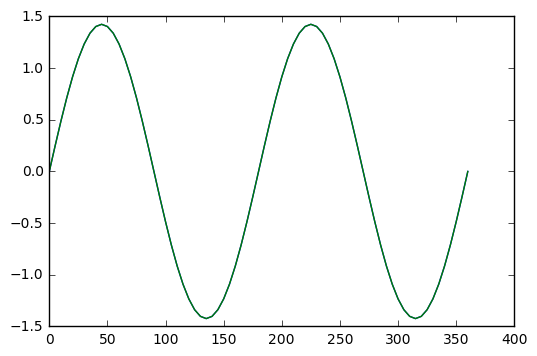

[[  8.34765373e-16   8.57832144e-16   8.72748191e-16   1.38564065e+00]
 [  2.47275113e-01   2.47275113e-01   2.47275113e-01   1.36429728e+00]
 [  4.87036898e-01   4.87036898e-01   4.87036898e-01   1.30091567e+00]
 [  7.12000312e-01   7.12000312e-01   7.12000312e-01   1.19742166e+00]
 [  9.15329957e-01   9.15329957e-01   9.15329957e-01   1.05695984e+00]
 [  1.09084777e+00   1.09084777e+00   1.09084777e+00   8.83798083e-01]
 [  1.23322072e+00   1.23322072e+00   1.23322072e+00   6.83197819e-01]
 [  1.33812288e+00   1.33812288e+00   1.33812288e+00   4.61254184e-01]
 [  1.40236686e+00   1.40236686e+00   1.40236686e+00   2.24710825e-01]
 [  1.42400062e+00   1.42400062e+00   1.42400062e+00  -1.92450090e-02]
 [  1.40236686e+00   1.40236686e+00   1.40236686e+00  -2.63200843e-01]
 [  1.33812288e+00   1.33812288e+00   1.33812288e+00  -4.99744202e-01]
 [  1.23322072e+00   1.23322072e+00   1.23322072e+00  -7.21687836e-01]
 [  1.09084777e+00   1.09084777e+00   1.09084777e+00  -9.22288101e-01]
 [  9.

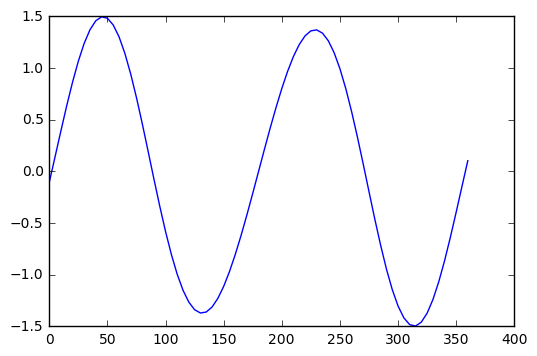

0
0


In [516]:
c1 = 8. * np.sin(2. * np.array(range(0,365,5)) * np.pi / 180. )
c2 = 6. * np.cos(2. * np.array(range(0,365,5)) * np.pi / 180. )

c = np.column_stack((c1, c2))

c = pd.DataFrame(data=c[0:,0:])

i = pca.inverse_transform(H)
#print(i)
plt.plot(x, i[0:,0])
plt.plot(x, i[0:,1])
plt.show()

print(i)

j = pcafail.inverse_transform(V)
#print(j)
plt.plot(x, j[0:,0])
plt.show()


##TRUTH FUNCTION
def truth(i):
    if (i[0:,0] == i[0:,1]) and (i[0:,2] == i[0:,3]):
        return 1
    else:
        return 0
    
def truth(j):
    if (j[0,0] == 0):
        return 1
    else:
        return 0
    
print(truth(i))
print(truth(j))

-------
## Step 13: Simulation Assessment
The algorithm performed as I anticipated on the simulated data, so it appears as though my understanding was good.